# 1. Prepare the environment for Python 3 with Tensorflow and Keras

In [1]:
#Print Python's version:
!python --version

#Import Tensorflow and Keras:
%tensorflow_version 1.x
import tensorflow as tf
import keras

Python 3.6.9
TensorFlow 1.x selected.


Using TensorFlow backend.


# 2. Download and prepare the data

In [3]:
#Get access to Google Drive:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#Obtain the attributes and the labels:
import pandas as pd
attributes = pd.read_csv("/content/drive/My Drive/OceanProximityPreparedCleanAttributes.csv")
labels = pd.read_csv("/content/drive/My Drive/OceanProximityOneHotEncodedClasses.csv")
print(attributes.columns)
print(labels.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')
Index(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype='object')


In [3]:
#Data split:
print(labels.head(10))
#The data is already ramdomnized, so there is no doing for that.

#Split the data in the following way:
#80% -> training dataset
#10% -> validation dataset
#10% -> testing dataset
l = labels.shape[0]
print(l)
training_instances = int(l*0.8)
validation_instances = int(training_instances + l*0.1)

tr_attributes = attributes[0:training_instances]
tr_labels = labels[0:training_instances]
val_attributes = attributes[training_instances:validation_instances]
val_labels = labels[training_instances:validation_instances]
test_attributes = attributes[validation_instances:]
test_labels = labels[validation_instances:]
print("Data split done!")

   <1H OCEAN  INLAND  NEAR BAY  NEAR OCEAN
0        0.0     0.0       0.0         1.0
1        0.0     0.0       1.0         0.0
2        0.0     1.0       0.0         0.0
3        1.0     0.0       0.0         0.0
4        0.0     0.0       0.0         1.0
5        0.0     1.0       0.0         0.0
6        1.0     0.0       0.0         0.0
7        1.0     0.0       0.0         0.0
8        0.0     1.0       0.0         0.0
9        1.0     0.0       0.0         0.0
20428
Data split done!


# 3. The Neural Network

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras import optimizers

input_shape = tr_attributes.shape[1]
num_classes = tr_labels.shape[1]

mlp = Sequential() 
mlp.add(Dense(1000, input_shape = (input_shape,)))
mlp.add(Activation('relu'))
mlp.add(Dropout(0.3))
mlp.add(Dense(750))
mlp.add(Activation('relu'))
mlp.add(Dropout(0.3))
mlp.add(Dense(250))
mlp.add(Activation('relu'))
mlp.add(Dropout(0.3))
mlp.add(Dense(num_classes))
mlp.add(Activation('softmax'))

opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
mlp.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
mlp.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 1000)              10000     
_________________________________________________________________
activation_13 (Activation)   (None, 1000)              0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 750)               750750    
_________________________________________________________________
activation_14 (Activation)   (None, 750)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 750)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 250)              

In [14]:
from time import time
import matplotlib.pyplot as plt
%matplotlib inline 

data = mlp.fit(tr_attributes,
               tr_labels,
               batch_size=2048, 
               epochs=4096,
               verbose=1,
               validation_data=(val_attributes, val_labels))

start = time()
loss, acc = mlp.evaluate(test_attributes, test_labels, verbose=0)
end = time()
print('ffNN took ' + str(end - start) + ' seconds')
print('Test loss: ' + str(loss) + ' - Accuracy: ' + str(acc))

Se han truncado las últimas 5000 líneas del flujo de salida.
16342/16342 [==============================] - 0s 16us/step - loss: 0.0948 - acc: 0.9594 - val_loss: 0.1010 - val_acc: 0.9618
Epoch 1599/4096
16342/16342 [==============================] - 0s 16us/step - loss: 0.0947 - acc: 0.9596 - val_loss: 0.1065 - val_acc: 0.9574
Epoch 1600/4096
16342/16342 [==============================] - 0s 15us/step - loss: 0.0898 - acc: 0.9632 - val_loss: 0.0995 - val_acc: 0.9643
Epoch 1601/4096
16342/16342 [==============================] - 0s 15us/step - loss: 0.0917 - acc: 0.9614 - val_loss: 0.1143 - val_acc: 0.9589
Epoch 1602/4096
16342/16342 [==============================] - 0s 15us/step - loss: 0.0935 - acc: 0.9608 - val_loss: 0.1005 - val_acc: 0.9623
Epoch 1603/4096
16342/16342 [==============================] - 0s 15us/step - loss: 0.0908 - acc: 0.9623 - val_loss: 0.0994 - val_acc: 0.9643
Epoch 1604/4096
16342/16342 [==============================] - 0s 15us/step - loss: 0.0971 - acc: 0.958

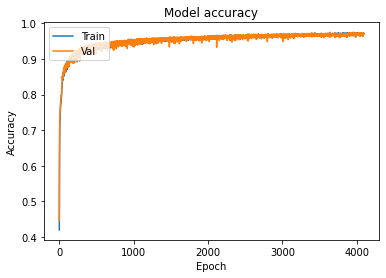

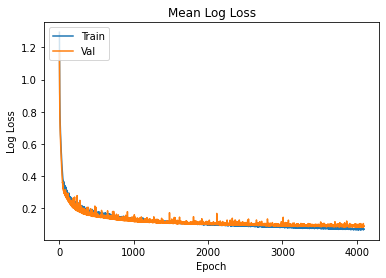

[[903   8   1  10]
 [ 10 615   1   0]
 [  2   0 223   0]
 [ 16   0   6 249]]


In [12]:
plt.plot(data.history['acc'])
plt.plot(data.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

plt.plot(data.history['loss'])
plt.plot(data.history['val_loss'])
plt.title('Mean Log Loss')
plt.ylabel('Log Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

labels = tf.argmax(test_labels, axis = 1)
predictions=mlp.predict_classes(test_attributes)
confusion_matrix = tf.confusion_matrix(labels=labels, predictions=predictions, num_classes=num_classes)
with tf.Session() as sess:
    print(confusion_matrix.eval())